In [1]:
import tensorflow as tf
from keras import layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import itertools

1.- Dataset Preparation:

* Download and preprocess the Caltech-256 dataset. You can use the tensorflow_datasets library to load the dataset conveniently.
* Normalize the pixel values of the images to the range [0, 1].
* Split the dataset into training and testing sets.

In [2]:
(train_dataset, test_dataset), dataset_info = tfds.load(
    name='caltech101',
    split=['train[:80%]', 'train[20%:]'],
    with_info=True,
    as_supervised=True,
   #data_dir='C:\\Users\\ivanc\\PycharmProjects\\scientificProject',
    data_dir='./data',
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/3060 [00:00<?, ? examples/s]

Shuffling data/caltech101/incomplete.0NT02V_3.0.2/caltech101-train.tfrecord*...:   0%|          | 0/3060 [00:0…

Generating test examples...:   0%|          | 0/6084 [00:00<?, ? examples/s]

Shuffling data/caltech101/incomplete.0NT02V_3.0.2/caltech101-test.tfrecord*...:   0%|          | 0/6084 [00:00…

Dataset caltech101 downloaded and prepared to ./data/caltech101/3.0.2. Subsequent calls will reuse this data.


In [3]:
num_classes = dataset_info.features['label'].num_classes

def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_dataset = train_dataset.map(preprocess_image).shuffle(1000).batch(32)
test_dataset = test_dataset.map(preprocess_image).batch(32)

2.- Build the CNN Model: Define a CNN model with the following architecture:

* Convolutional Layer 1: 32 filters, kernel size (3x3), ReLU activation.
* Max Pooling Layer 1: Pooling size (2x2).
* Convolutional Layer 2: 64 filters, kernel size (3x3), ReLU activation.
* Max Pooling Layer 2: Pooling size (2x2).
* Flatten the feature maps.
* Fully Connected Layer 1: 128 units, ReLU activation.
* Output Layer: Number of units equal to the number of classes in the Caltech-101 dataset.

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

3.- Training the Model:

* Compile the model with an appropriate optimizer and loss function.
* Train the model using the training dataset and validate it using the testing dataset.
* Observe the training process, including the loss and accuracy metrics.

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
77/77 [==============================] - 38s 475ms/step - loss: 5.6322 - accuracy: 0.0167 - val_loss: 4.4534 - val_accuracy: 0.0699
Epoch 2/10
77/77 [==============================] - 36s 463ms/step - loss: 4.1216 - accuracy: 0.1324 - val_loss: 3.1702 - val_accuracy: 0.3893
Epoch 3/10
77/77 [==============================] - 36s 463ms/step - loss: 2.2748 - accuracy: 0.5065 - val_loss: 1.6771 - val_accuracy: 0.7059
Epoch 4/10
77/77 [==============================] - 36s 461ms/step - loss: 0.5986 - accuracy: 0.8742 - val_loss: 1.3549 - val_accuracy: 0.7896
Epoch 5/10
77/77 [==============================] - 35s 459ms/step - loss: 0.1135 - accuracy: 0.9816 - val_loss: 1.4485 - val_accuracy: 0.7974
Epoch 6/10
77/77 [==============================] - 35s 460ms/step - loss: 0.0458 - accuracy: 0.9926 - val_loss: 1.5819 - val_accuracy: 0.8002
Epoch 7/10
77/77 [==============================] - 35s 458ms/step - loss: 0.0637 - accuracy: 0.9894 - val_loss: 1.5363 - val_accuracy: 0.7953

4.- Understanding Parameter Sharing and Local Receptive Fields:

* Analyze the number of learnable parameters in each layer of the CNN model.

¿What is parameter sharing? ¿What's its role in reducing the model's complexity?

In [6]:
num_params = model.count_params()
print(f"Number of trainable parameters in the model: {num_params}")

Number of trainable parameters in the model: 23920550


5.- Evaluation and Interpretation:

* Evaluate the model's performance on the testing dataset and calculate the accuracy.
* Visualize some misclassified images and discuss the possible reasons for misclassifications.

In [7]:
loss, accuracy = model.evaluate(test_dataset)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

77/77 [==============================] - 5s 71ms/step - loss: 1.6806 - accuracy: 0.8035
Accuracy on the test set: 80.35%


1/1 [==============================] - 0s 63ms/step


ValueError: num must be an integer with 1 <= num <= 25, not 26

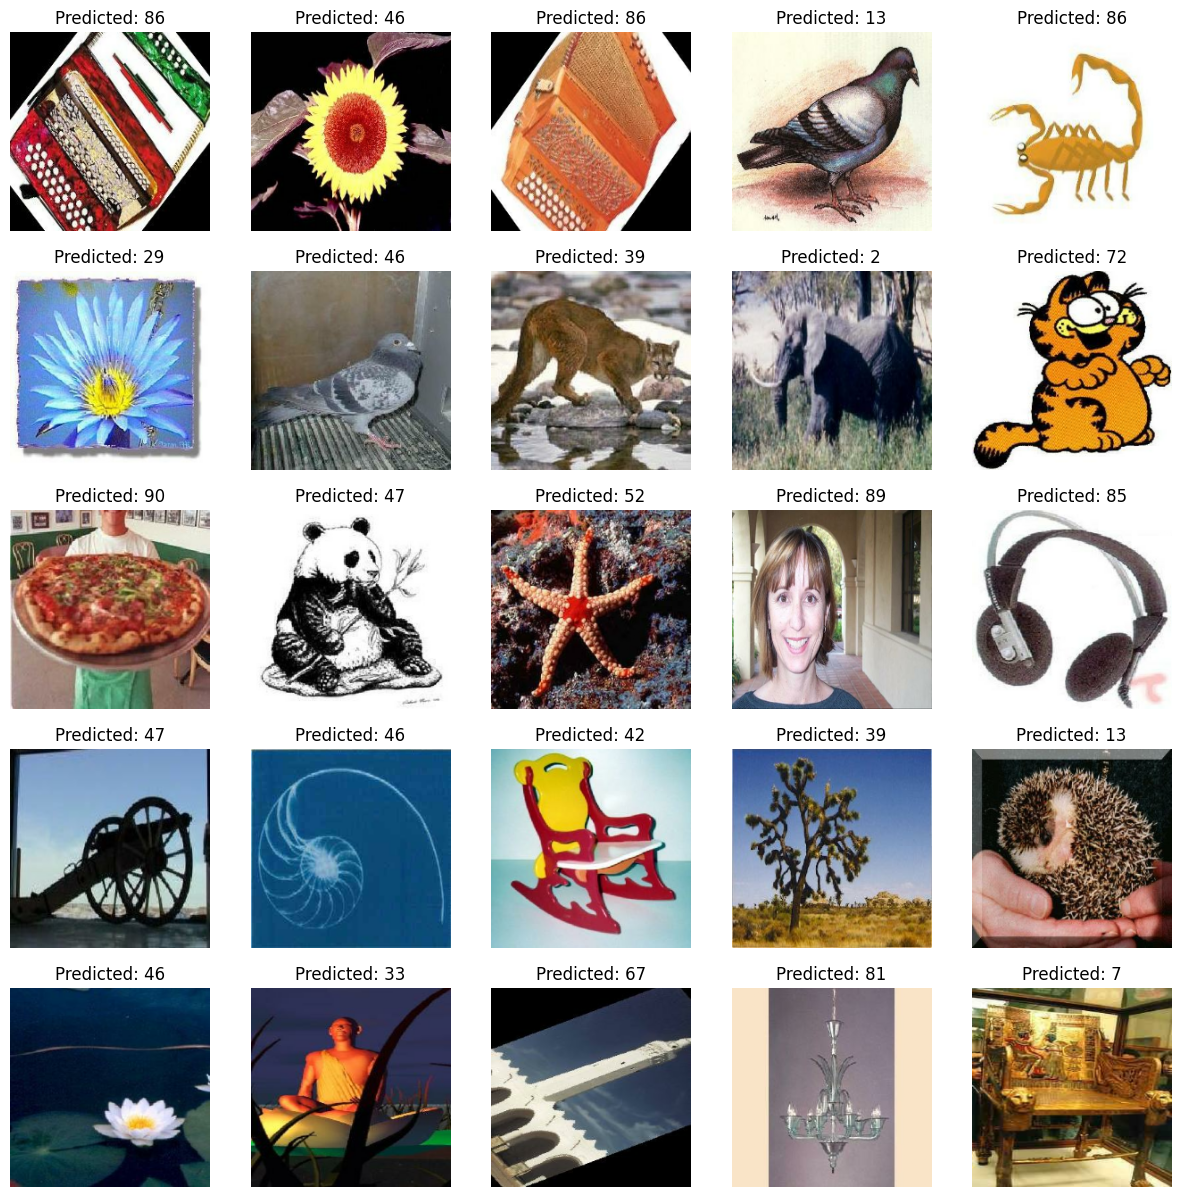

In [16]:
misclassified_images = []
misclassified_labels = []
for image, label in test_dataset:
    predictions = model.predict(image)
    predicted_label = np.argmax(predictions, axis=1)
    misclassified_idx = np.where(predicted_label != label.numpy())[0]
    for idx in misclassified_idx:
        misclassified_images.append(image[idx])
        misclassified_labels.append(predicted_label[idx])

plt.figure(figsize=(15, 15))
for i in range(len(misclassified_images)):
    plt.subplot(5, 5, i+1)
    plt.imshow(misclassified_images[i])
    plt.title(f"Predicted: {misclassified_labels[i]}")
    plt.axis('off')
plt.show()

6.- Pick a sample image and show the feature maps activated by the convolutional layers

1/1 [==============================] - 0s 89ms/step


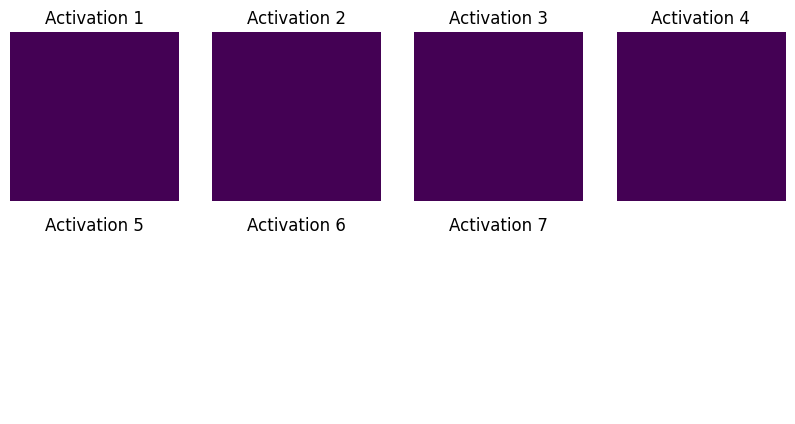

In [17]:
sample_image, _ = next(itertools.islice(iter(test_dataset), 0, 1))
sample_image = sample_image[:1]

activation_model = models.Model(inputs=model.input,
                                outputs=[layer.output for layer in model.layers])
# activation_model = models.Model(inputs=model.input, outputs=model.layers[4].output)
activations = activation_model.predict(sample_image)

plt.figure(figsize=(10, 5))
for i, activation in enumerate(activations):
    plt.subplot(2, 4, i+1)
    try:
        plt.imshow(activation[0, :, :, 0], cmap='viridis')
    except:
        pass
    plt.title(f"Activation {i+1}")
    plt.axis('off')
plt.show()

In [14]:
sample_image, _ = next(itertools.islice(iter(test_dataset), 0, 1))


In [12]:
s = sample_image[:1]
s

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.96156245, 0.94417614, 0.9590843 ],
         [0.938924  , 0.92196536, 0.9366597 ],
         [0.94594246, 0.9283304 , 0.9433514 ],
         ...,
         [0.83993846, 0.84498864, 0.81305176],
         [0.76067716, 0.760747  , 0.735152  ],
         [0.6307621 , 0.62684053, 0.6072327 ]],

        [[0.98490894, 0.98837537, 0.9948417 ],
         [0.9676474 , 0.9746505 , 0.9854695 ],
         [0.980007  , 0.98413867, 0.9908248 ],
         ...,
         [0.81471634, 0.8258964 , 0.79488623],
         [0.75486445, 0.758926  , 0.7333665 ],
         [0.6450046 , 0.64507467, 0.62347096]],

        [[0.94719076, 0.9835703 , 0.98663527],
         [0.9236923 , 0.9628958 , 0.96637434],
         [0.9325427 , 0.968187  , 0.97178435],
         ...,
         [0.7959621 , 0.81336963, 0.78591865],
         [0.75840056, 0.7695806 , 0.7424219 ],
         [0.6712415 , 0.6818158 , 0.65496004]],

        ...,

        [[0.87002385, 0.94453365, 